In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

In [12]:
df = pd.read_csv('day2.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


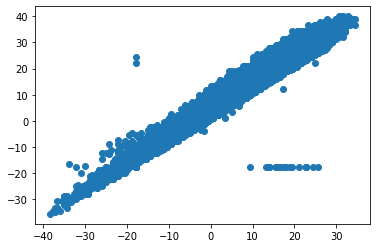

In [16]:
meanTemp = df['MeanTemp']
meanTemp.describe()
minTemp = df['MinTemp']

plt.scatter(minTemp, meanTemp)
plt.show()

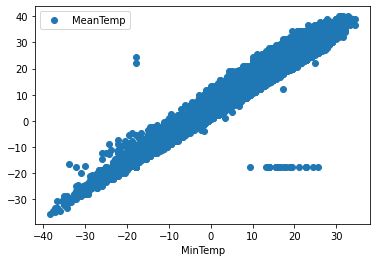

In [17]:
df.plot(x='MinTemp', y='MeanTemp', style='o')
plt.show()

In [24]:
x = [[i] for i in list(minTemp)]
y = [[i] for i in list(meanTemp)]

r = LinearRegression().fit(x, y)
r.score(x,y)

0.9320447932341193

In [25]:
x = minTemp.values.reshape(-1,1)
y = meanTemp.values.reshape(-1,1)
print(x)
reg = LinearRegression().fit(x, y)
reg.score(x, y)


[[22.22222222]
 [21.66666667]
 [22.22222222]
 ...
 [18.33333333]
 [18.33333333]
 [17.22222222]]


0.9320447932341193

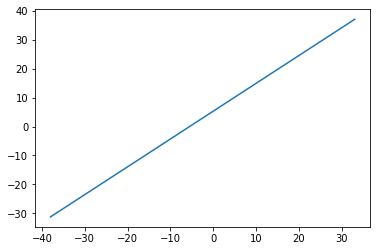

In [38]:
m = reg.coef_
c = reg.intercept_


#y = mx + c
xdash = [int(i[0]) for i in x]
x_values = [i for i in range(min(xdash), max(xdash))]
y_values = [(m[0]*i)+c for i in range(min(xdash), max(xdash))]

# print(x_values)
# print(y_values)

plt.plot(x_values, y_values)
plt.show()

[[30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]]


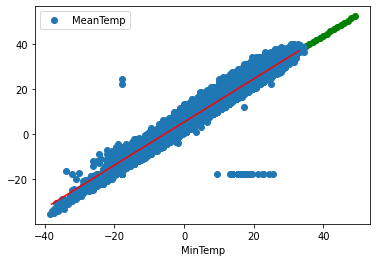

In [54]:
df.plot(x='MinTemp', y='MeanTemp', style='o')
plt.plot(x_values, y_values, color='red')
x_train = np.array([i for i in range(30, 50)])
x_train = x_train.reshape(-1,1)
print(x_train)
y_train = reg.predict(x_train)
plt.scatter(x_train, y_train, color="green")
plt.show()